Based on paper: "A Multilevel Image Thresholding Using Particle Swarm Optimization"

*O código abaixo busca estabelecer Multi Thresholds de uma imagem a partir da PSO - Particle Swarm Optimization e utilizando a Entropia de Shannon como função Fitness*

In [3]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('000280.jpg', 0)

# Define PSO parameters
num_particles = 50
max_velocity = 5
inertia_weight = 0.9
num_iterations = 100

# Initialize the swarm of particles
swarm = np.random.randint(0, 255, size=(num_particles, 3))

# Define fitness function
def fitness(thresholds):
    # Convert thresholds to integer values
    thresholds = thresholds.astype(int)

    # Compute the histogram of the image
    hist, _ = np.histogram(img, bins=256, range=(0, 256))

    # Compute the entropy of the image
    n = len(img)
    p = hist / n
    p = p[np.nonzero(p)]
    entropy = -np.sum(p * np.log2(p))

    # Compute the entropy between-class variance
    vb = 0
    for t in thresholds:
        w0 = np.sum(hist[:t]) / n
        w1 = np.sum(hist[t:]) / n
        if w0 == 0 or w1 == 0:
            continue
        p0 = hist[:t] / n / w0
        p1 = hist[t:] / n / w1
        p0 = p0[np.nonzero(p0)]
        p1 = p1[np.nonzero(p1)]
        entropy0 = -np.sum(p0 * np.log2(p0))
        entropy1 = -np.sum(p1 * np.log2(p1))
        vb += (w0 * entropy0 + w1 * entropy1) * (w0 * w1)

    return vb

# Update personal best position
def update_personal_best(swarm, personal_best):
    for i in range(len(swarm)):
        if fitness(swarm[i]) > fitness(personal_best[i]):
            personal_best[i] = swarm[i].copy()

    return personal_best

# Update global best position
def update_global_best(personal_best, global_best):
    best_fitness = np.max([fitness(thresholds) for thresholds in personal_best])
    if best_fitness > fitness(global_best):
        best_index = np.argmax([fitness(thresholds) for thresholds in personal_best])
        global_best = personal_best[best_index].copy()

    return global_best

# Update velocity and position
def update_velocity_position(swarm, personal_best, global_best, max_velocity, inertia_weight):
    for i in range(len(swarm)):
        r1 = np.random.rand(3)
        r2 = np.random.rand(3)
        velocity = inertia_weight * swarm[i] + r1 * (personal_best[i] - swarm[i]) + r2 * (global_best - swarm[i])
        velocity = np.clip(velocity, -max_velocity, max_velocity)
        swarm[i] = (swarm[i] + velocity).astype(int)

    return swarm

# Run PSO algorithm
global_best = np.zeros(3)
personal_best = swarm.copy()

for i in range(num_iterations):
    personal_best = update_personal_best(swarm, personal_best)
    global_best = update_global_best(personal_best, global_best)
    swarm = update_velocity_position(swarm, personal_best, global_best, max_velocity, inertia_weight)

# Get the optimal thresholds
thresholds = global_best.astype(int)

# Apply the thresholds to the image
result = np.zeros_like(img)
for i in range(len(thresholds)):
    if i == 0:
        result[img <= thresholds[i]] = 255 // len(thresholds)
    elif i == len(thresholds) - 1:
        result[img > thresholds[i]] = 255
    else:
        result[(img > thresholds[i-1]) & (img <= thresholds[i])] = (i * 255) // len(thresholds)

# Display the result
#print("The thresholds value are: ", thresholds)

#cv2.imshow('threshold', result)
#cv2.imshow('image base', img)
#cv2.imshow(thresholds)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

The thresholds value are:  [ 59  61 110]


The thresholds value is:  [ 59  61 110]


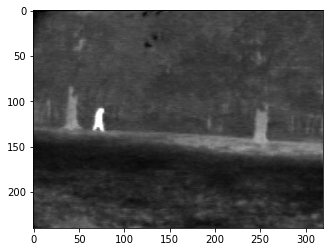

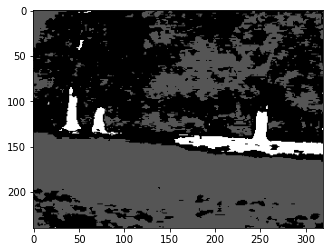

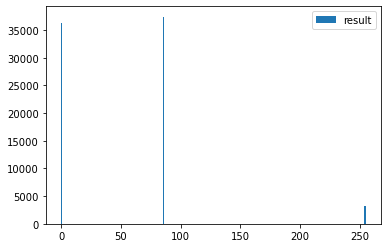

In [9]:
from matplotlib import pyplot as plt

def imshow(img):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()
    
print("The thresholds value is: ", thresholds)
imshow(img)
imshow(result)


plt.figure()
plt.hist(result.flatten(), bins=np.arange(256))
plt.legend(["result"])
plt.show()